In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\91783\Desktop\subham\H_Ankl_1_2_19-3_12_22-_41_ (copy)_INDEX_Mean.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
df.head()

#y = pd.Series(data=df['PM2.5'].values, index=df['Date'])
#y.head()

,Date,PM25
0,2019-04-02 18:00:00,70.52
1,2019-04-02 19:00:00,61.39
2,2019-04-02 20:00:00,59.94
3,2019-04-02 21:00:00,76.44
4,2019-04-02 22:00:00,98.54


In [3]:
#df = df.set_index('Date').asfreq('D')

In [3]:
#df.columns = ['PM25']

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [4]:
print(f'The Daily data consists of values from {df.index.min()} to {df.index.max()}')

The Daily data consists of values from 0 to 33534


In [5]:
# Finding the split point index to keep 1 month (30 days) data as test set
n_test = 61
train_data = df.iloc[:len(df) - n_test]
test_data = df.iloc[len(df) - n_test:]

In [6]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [8]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['PM25'],order=(0, 1, 2),seasonal_order=(0,2,2,12))
results=model.fit()

In [ ]:
results.summary()

In [10]:
# Obtain predicted values on the test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = results.predict(start=start,end=end,dynamic=True,typ='levels').rename('SARIMAX Predictions')

In [11]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted = {predictions[i]}, expected = {test_data['PM2.5'][i]}")

predicted = 83.0426918587702, expected = 90.12
predicted = 76.2652997011814, expected = 170.65
predicted = 96.91056566114712, expected = 157.98
predicted = 88.02635858409465, expected = 144.02
predicted = 75.13969976656509, expected = 61.85
predicted = 94.91872854212923, expected = 153.96
predicted = 114.86534747192921, expected = 55.08
predicted = 101.31967112013513, expected = 36.68
predicted = 114.60239223890156, expected = 47.06
predicted = 110.03382480701472, expected = 79.04
predicted = 90.08038046135442, expected = 240.02
predicted = 78.88561382371432, expected = 89.37
predicted = 76.41586925809307, expected = 243.41
predicted = 77.95119150026153, expected = 146.21
predicted = 99.41303504325111, expected = 190.12
predicted = 90.55879540341391, expected = 203.1
predicted = 77.41300470574942, expected = 240.0
predicted = 97.75936891948855, expected = 201.74
predicted = 118.2800131180434, expected = 173.63
predicted = 102.99786009454048, expected = 195.11
predicted = 116.9082191631

In [12]:
compare = pd.DataFrame(columns=['Actual','Predicted'])
compare['Actual'] = test_data['PM2.5']
compare['Predicted'] = predictions
compare.head()

,Actual,Predicted
Date,,
2021-11-01,90.12,83.042692
2021-11-02,170.65,76.265300
2021-11-03,157.98,96.910566
2021-11-04,144.02,88.026359
2021-11-05,61.85,75.139700


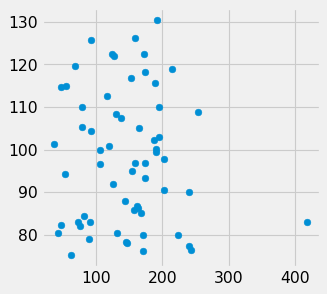

In [13]:
plt.figure(figsize=(4,4),dpi=80)
#plt.plot(legend=True,figsize=(4, 4))
plt.scatter(test_data,predictions)
plt.show()

<AxesSubplot:xlabel='PM2.5', ylabel='SARIMAX Predictions'>

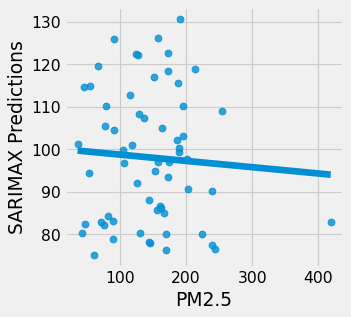

In [14]:
import seaborn as sb
plt.figure(figsize=(4,4),dpi=80)
sb.regplot(test_data,predictions,ci=None)

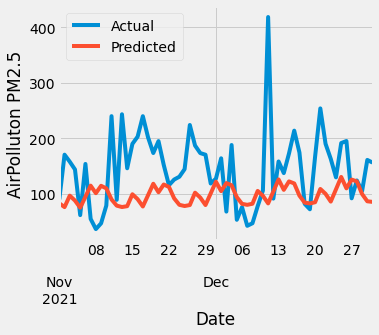

In [15]:
compare.plot(legend=True,figsize=(5, 4))
plt.ylabel('AirPolluton PM2.5')
plt.show()

In [16]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f"ARIMA MAE : {mean_absolute_error(compare['Actual'],compare['Predicted'])}")
print(f"ARIMA MSE : {mean_squared_error(compare['Actual'],compare['Predicted'])}")

ARIMA MAE : 63.495372087041495
ARIMA MSE : 6949.824366632051


In [17]:
rmse = np.mean((compare['Predicted']- compare['Actual'])**2)**.5  # RMSE
print('RMSE')
print(rmse)

RMSE
83.36560661706993


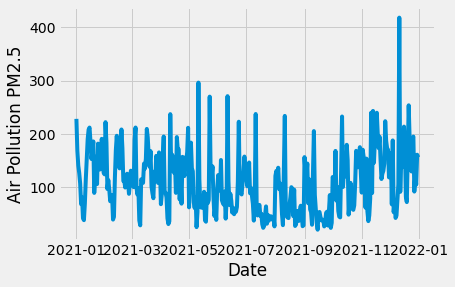

In [18]:
plt.xlabel("Date")
plt.ylabel("Air Pollution PM2.5")
plt.plot(df)